<a href="https://colab.research.google.com/github/PGV1000/DeepLearning/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5%20%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5%20%E2%84%962/DeepNN_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%BE%D0%B5_%D0%B7%D0%B0%D0%BD%D1%8F%D1%82%D0%B8%D0%B5_%E2%84%962_%D0%9C%D0%B5%D0%B4%D0%B2%D0%B5%D0%B4%D0%B5%D0%B2_%D0%94_%D0%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Практическая работа №2. Использование глубоких нейронных сетей для решения задач регрессии и классификации



**Ссылка на код с пары:**
https://colab.research.google.com/drive/18EM8mrpURStkmbxWjZybWbWh23Si5b4A?usp=sharing


## Задание №1. Обучение модели ИНС для решения задачи регрессии



Постройте глубокую нейронную сеть для предсказания цен на недвижимость в городе Бостон, используя датасет датасет boston_housing_price

[Описание датасета](https://www.hackersrealm.net/post/boston-house-price-prediction-analysis-using-python)

#### 1.1. Загружаем исходные данные:

In [ ]:
import pandas as pd
import numpy as np
!pip install --upgrade -q gdown
!gdown --id 10EGlLf-Jj0Izben6B9yDoIi8xPGDnkC0

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10EGlLf-Jj0Izben6B9yDoIi8xPGDnkC0
To: /content/kaggle.json
100% 63.0/63.0 [00:00<00:00, 247kB/s]


In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d puxama/bostoncsv

  0% 0.00/12.8k [00:00<?, ?B/s]
100% 12.8k/12.8k [00:00<00:00, 19.5MB/s]


In [ ]:
!unzip -o bostoncsv.zip

Archive:  bostoncsv.zip
  inflating: Boston.csv              


In [ ]:
df = pd.read_csv("Boston.csv")
x = df.drop(['Unnamed: 0', 'medv'], axis=1)
y = df['medv']

x.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [ ]:
print(x.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio       black  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
x_train.shape, y_train.shape

((404, 13), (404,))

#### 1.2. Проектируем архитектуру для этой задачи

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

x_train_n = scaler.fit_transform(x_train)
x_test_n = scaler.transform(x_test)

In [ ]:
# Сохранение модели scaler
import pickle

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

In [ ]:
# Ваш код

from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD, Adam


model = Sequential([
    Dense(26, input_shape=(13,), activation='relu'),
    Dense(13, input_shape=(), activation='relu'),
    Dense(1, activation='relu')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                364       
                                                                 
 dense_1 (Dense)             (None, 13)                351       
                                                                 
 dense_2 (Dense)             (None, 1)                 14        
                                                                 
Total params: 729 (2.85 KB)
Trainable params: 729 (2.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


#### 1.3. Компилируем модель ИНС

Подберите нужную функцию потерь и метрику.

In [ ]:
# Ваш код
SPEED = 0.1
EPOCHS = 40
model.compile(optimizer=Adam(learning_rate=SPEED), loss='mse', metrics='mae')

#### 1.4. Обучаем модель ИНС

In [ ]:
history = model.fit(x_train_n, y_train, validation_data=(x_test_n, y_test), epochs=EPOCHS)

Epoch 1/40
13/13 [==============================] - 2s 47ms/step - loss: 239.6591 - mae: 11.9767 - val_loss: 89.2740 - val_mae: 7.5769
Epoch 2/40
13/13 [==============================] - 0s 11ms/step - loss: 59.4576 - mae: 5.3423 - val_loss: 64.0724 - val_mae: 5.5434
Epoch 3/40
13/13 [==============================] - 0s 13ms/step - loss: 48.1063 - mae: 4.7969 - val_loss: 58.2305 - val_mae: 4.8558
Epoch 4/40
13/13 [==============================] - 0s 13ms/step - loss: 40.1809 - mae: 4.3548 - val_loss: 37.2395 - val_mae: 4.9515
Epoch 5/40
13/13 [==============================] - 0s 13ms/step - loss: 31.3354 - mae: 3.9517 - val_loss: 25.4176 - val_mae: 3.4188
Epoch 6/40
13/13 [==============================] - 0s 11ms/step - loss: 23.1346 - mae: 3.3006 - val_loss: 23.6965 - val_mae: 3.8125
Epoch 7/40
13/13 [==============================] - 0s 12ms/step - loss: 22.0445 - mae: 3.2093 - val_loss: 17.2939 - val_mae: 2.9792
Epoch 8/40
13/13 [==============================] - 0s 11ms/step - 

#### 1.6. Делаем предсказания на тестовых данных

In [ ]:
# Ваш код
preds = model.predict(x_test_n)

4/4 [==============================] - 0s 5ms/step


#### 1.7. Вычисляем метрику качества на тестовых данных

In [ ]:
# Ваш код
from sklearn.metrics import mean_absolute_error

mean_absolute_error(preds, y_test)

2.4837434768676756

#### 1.8. Строим график обучения

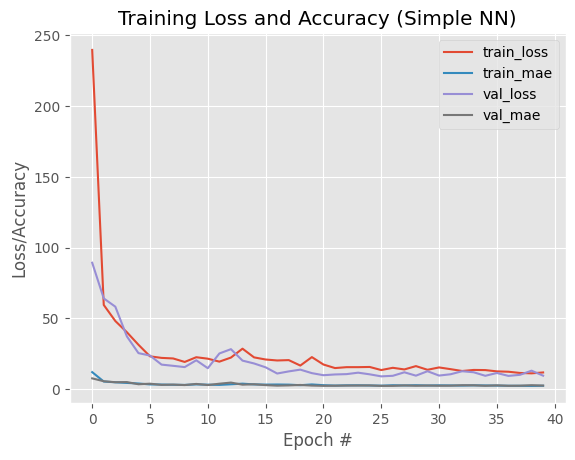

In [ ]:
# Ваш код
# строим графики потерь и точности
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt

N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["mae"], label="train_mae")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["val_mae"], label="val_mae")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
# plt.savefig('plot.png')
# cv2_imshow(cv2.imread("plot.png"))


#### 1.9. Построение графического интерфейса в Gradio Проверка обученной модели пользовательскими данными

In [ ]:
def preprocess_input(features, scale_model="scaler.pkl"):

  """
  Функция преобразует входные данные в формат,
  подходящий для модели машинного обучения.

  Args:
      features: Список или массив с входными признаками.
      scale_model: Путь к файлу с сохраненной моделью масштабирования.

  Returns:
      Преобразованный массив признаков.
  """

  try:
    # Преобразование в NumPy массив
    features = np.array(features)

    # Проверка на пустой массив
    if not features.size:
      raise ValueError("Пустой массив признаков!")

    # Изменение размерности массива (8,) -> (1, 8)
    features = features.reshape(1, -1)

    # Загрузка модели масштабирования
    with open(scale_model, "rb") as f:
      scaler = pickle.load(f)

    # Масштабирование признаков
    features = scaler.transform(features)

  except Exception as e:
    raise ValueError(f"Ошибка при предобработке: {e}")

  return features

In [ ]:
def predict_price(*features):

  """
  Функция прогнозирует цену на основе предобработанных
  входных признаков.

  Args:
      features: Список или массив с входными признаками.

  Returns:
      Прогнозируемая цена (в долларах).
  """

  try:
    # Предобработка входных признаков
    features = preprocess_input(features)

    # Прогнозирование цены
    prediction = model.predict(features, verbose=0)

    # Проверка на ошибки прогнозирования
    if np.isnan(prediction).any():
      raise ValueError("Ошибка при прогнозировании: NaN")

  except Exception as e:
    raise ValueError(f"Ошибка при прогнозировании: {e}")

  # Возвращение прогнозируемой цены
  # (умножение на 1000 для отображения в тысячах долларов)
  return f"{prediction[0][0] * 1000}"

In [ ]:
# Ваш код
!pip install -q gradio

import gradio as gr

# Интерфейс Gradio
interface = gr.Interface(
    fn=predict_price,
    inputs=[
        gr.Slider(label="Crime rate", minimum=0, maximum=100, step=0.1, value=8.6),
        gr.Slider(label="Land zoned", minimum=0, maximum=100, step=0.1, value=23.3),
        gr.Slider(label="Non-retail", minimum=0, maximum=50, step=0.1, value=6.8),
        gr.Slider(label="Charles River", minimum=0, maximum=1, step=0.1, value=0.25),
        gr.Slider(label="Nitric Oxides", minimum=0, maximum=1, step=0.1, value=0.11),
        gr.Slider(label="Average rooms", minimum=1, maximum=10, step=0.1, value=0.7),
        gr.Slider(label="Owner-occupied", minimum=1, maximum=100, step=0.1, value=28.1),
        gr.Slider(label="Distance center", minimum=0, maximum=15, step=0.1, value=2.1),
        gr.Slider(label="Radial highway", minimum=1, maximum=50, step=0.1, value=8.7),
        gr.Slider(label="tax-rate per 10k", minimum=100, maximum=1000, step=0.1, value=168.5),
        gr.Slider(label="Pupil-teacher rat.", minimum=1, maximum=50, step=0.1, value=2.1),
        gr.Slider(label="B", minimum=0, maximum=1000, step=0.1, value=91.3),
        gr.Slider(label="Lower status", minimum=1, maximum=50, step=0.1, value=7.2),
    ],
    # Обновление при каждом изменении
    live=True,
    outputs=gr.Text(label="Predicted Price ($)"),
)

# Запуск интерфейса
interface.launch(debug=True, share=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.0/17.0 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.1/92.1 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.7/310.7 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.5/138.5 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.8/77.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 kB 7.3 MB/s eta 0:00:00
Colab notebook detected. This cell will run indefinitely so that you ca

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Keyboard interruption in main thread... closing server.
Killing tunnel 127.0.0.1:7860 <> https://57311e113d6065a98d.gradio.live


## Задание №2.Обучение модели ИНС для решения задачи классификации



Порядок работы:

* 1. Собрать датасет из изображений, соответствующих не менее, чем 3 классам объектов (в
примере с пары были кошки, собаки и панды).


- 2. Для каждого класса должно быть собрано не менее 1000 изображений. Количество
изображений для каждого класса должно быть одинаковым.
Готовые датасеты можно скачать отсюда: https://www.kaggle.com/


- 3. Обучить модель глубокой нейронной сети для решения задачи классификации
изображений, по выбранным Вами классам. (В качестве примера приведён код с пары)
В конечном итоге Вы должны сохранить обученную модель для классификации
изображений, соответствующих тем классам, которые Вы выбрали, а затем воспользоваться этой моделью для предсказания классов на пользовательских изображениях.



> При выполнении заданий пробуйте использовать разные функции потерь,
методы оптимизации, функции активации и метрики ошибок.

### 1. Устанавливаем зависимости:

In [ ]:
# Импортируем LabelBinarizer для преобразования текстовых меток в векторы
# (например, "кошка" -> [1, 0, 0], "собака" -> [0, 1, 0], "панда" -> [0, 0, 1])
from sklearn.preprocessing import LabelBinarizer

# Импортируем train_test_split для разделения данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

# Импортируем classification_report для оценки качества классификации
from sklearn.metrics import classification_report

# Импортируем Sequential для создания последовательной модели нейронной сети
from keras.models import Sequential

# Импортируем Dense для создания плотных слоев нейронной сети
from keras.layers import Dense

# Импортируем SGD и Adam для оптимизации обучения нейронной сети
from keras.optimizers import SGD, Adam

# Импортируем paths из imutils для удобной работы с путями к изображениям
from imutils import paths

# Импортируем pyplot из matplotlib для визуализации данных
import matplotlib.pyplot as plt

# Импортируем numpy для работы с массивами данных
import numpy as np

# Импортируем random для генерации случайных чисел
import random

# Импортируем pickle для сериализации и десериализации данных
import pickle

# Импортируем cv2 для работы с изображениями
import cv2

# Импортируем os для работы с файловой системой
import os

# Импортируем cv2_imshow из google.colab.patches для отображения изображений в Colab
from google.colab.patches import cv2_imshow

### 2. Загружаем набор данных:

In [ ]:
# импортируем бэкенд Agg из matplotlib для сохранения графиков на диск
import matplotlib
matplotlib.use("Agg")

In [ ]:
# Подключаем необходимые модули и пакеты
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import random
import pickle
import cv2
from google.colab.patches import cv2_imshow
import os

In [ ]:
# Ваш код
%%capture
DATADIR = 'Dataset'
if os.path.isdir(DATADIR)>0:
    print ('Data directory already exists and it is not empty, miss downloading')
else:
    print ('Data directory does not exists or it is empty, download the dataset')
    !gdown --id 1bOUvvaioUOMXaYvYY7vqm5y0s1QwuIIk #Скопировать ID из ссылки в гугл диске
    !unzip Dataset.zip

In [ ]:
# инициализируем данные и метки
print("[INFO] loading images...")
data = []
labels = []

[INFO] loading images...


### 3. Указываем путь к набору данных:

In [ ]:
# Ваш код
# Собираем список путей к каждому изображению и перемешиваем их
imagePaths = sorted(list(paths.list_images("/content/Dataset")))
print(imagePaths[700].split(os.path.sep)[-2])
random.shuffle(imagePaths)

A


### 4. Загружаем набор данных и формируем общую выборку:

In [ ]:
img_h = 80
img_w = 80
img_ch = 3
img_vector = img_w*img_w*img_ch

#### 4.1. Нормализуем данные:

Масштабируем интенсивности пикселей в диапазон [0, 1], а также преобразуем данные в массивы NumPy для повышения производительности


In [ ]:
# Ваш код
# цикл по изображениям
for imagePath in imagePaths[:15000]:
	image = cv2.imread(imagePath) # загружаем изображение
	image = cv2.resize(image, (img_h, img_w)).flatten() # меняем его разрешение на h*w пикселей (без учета соотношения сторон),																							# а затем "выраниваем" его в вектор, состоящий из (32*32*3) 3072 пикселей
	data.append(image) # добавляем в список
	label = imagePath.split(os.path.sep)[-2] 	# извлекаем метку класса из пути к изображению (метка класса зависит от имени папки)
	labels.append(label) # обновляем список меток

In [ ]:
# масштабируем интенсивности пикселей в диапазон [0, 1] (Нормализация данных)
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

#### 4.2. Формируем обучающую и валидационную выборки:

Разделяем данные на обучающую и валидационную выборки, используя 75% данных для обучения и оставшиеся 25% для валидации

In [ ]:
# Ваш код
# разбиваем данные на обучающую и тестовую выборки, используя 75%
# данных для обучения и оставшиеся 25% для тестирования
(trainX, valX, trainY, valY) = train_test_split(data,
	labels, test_size=0.25, random_state=28)

In [ ]:
# конвертируем метки из целых чисел в векторы (для 2х классов при
# бинарной классификации вам следует использовать функцию Keras
# "to_categorical" вместо "LabelBinarizer" из scikit-learn, которая не возвращает вектор)
lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)
valY = lb.transform(valY)

### 5. Создание модели:

#### 5.1. Определим архитектуру модели с помощью Keras:

In [ ]:
# Ваш код
# определим архитектуру 3072-1024-512-3 с помощью Keras
model = Sequential()
model.add(Dense(2048, input_shape=(img_vector,), activation="relu"))
model.add(Dense(512, activation="relu"))
model.add(Dense(len(lb.classes_), activation="softmax"))

#### 5.2. Установим значение параметров скорости обучения и общего числа эпох


In [ ]:
# Ваш код
# инициализируем скорость обучения и общее число эпох
INIT_LR = 0.01
EPOCHS = 80

#### 5.3. Компилируем модель:

In [ ]:
# Ваш код
# компилируем модель, используя SGD как оптимизатор и категориальную
# кросс-энтропию в качестве функции потерь (для бинарной классификации
# следует использовать binary_crossentropy)
print("[INFO] training network...")
opt = SGD(lr=INIT_LR)
model.compile(loss="categorical_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] training network...


### 6. Обучение модели искусственной нейронной сети:

#### 6.1. Добавим колбэки для сохранения лучшей модели по валидационной точности и остановки обучения, в случае, если модель перестала обучаться:

In [ ]:
# Ваш код
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(patience=5) # Остановка обучения, если
                                             # валидационная точность не
                                             # улучшается в течение 5 эпох
checkpoint = ModelCheckpoint(filepath="best_model.h5",
                             monitor="val_accuracy",
                             save_best_only=True,
                             verbose=0) # Сохранение модели
                                         # только при улучшении
                                         # валидационной точности

#### 6.2. Запустим процесс обучения модели:

In [ ]:
# Ваш код
# обучаем нейросеть
H = model.fit(trainX, trainY, validation_data=(valX, valY),
	epochs=EPOCHS, batch_size=50, callbacks=[early_stopping, checkpoint])

Epoch 1/80
225/225 [==============================] - ETA: 0s - loss: 3.0525 - accuracy: 0.1445

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


225/225 [==============================] - 103s 459ms/step - loss: 3.0525 - accuracy: 0.1445 - val_loss: 2.9030 - val_accuracy: 0.1595
Epoch 2/80
225/225 [==============================] - 95s 420ms/step - loss: 2.7420 - accuracy: 0.2113 - val_loss: 2.6758 - val_accuracy: 0.2059
Epoch 3/80
225/225 [==============================] - 93s 413ms/step - loss: 2.5095 - accuracy: 0.2611 - val_loss: 2.4148 - val_accuracy: 0.2736
Epoch 4/80
225/225 [==============================] - 92s 411ms/step - loss: 2.3317 - accuracy: 0.3044 - val_loss: 2.2812 - val_accuracy: 0.3000
Epoch 5/80
225/225 [==============================] - 86s 383ms/step - loss: 2.1804 - accuracy: 0.3398 - val_loss: 2.2026 - val_accuracy: 0.2952
Epoch 6/80
225/225 [==============================] - 94s 417ms/step - loss: 2.0492 - accuracy: 0.3756 - val_loss: 2.0991 - val_accuracy: 0.3392
Epoch 7/80
225/225 [==============================] - 94s 418ms/step - loss: 1.9139 - accuracy: 0.4188 - val_loss: 1.9233 - val_accuracy: 0.

#### 6.3. Загружаем лучшую модель:

In [ ]:
print(H.params['epochs'])

80


In [ ]:
# Ваш код
from keras.models import load_model

model = load_model("/content/best_model.h5")

### 7. Оценка точности:

#### 7.1. Выведем отчет классификации

In [ ]:
# Ваш код
# оцениваем нейросеть
print("[INFO] evaluating network...")
predictions = model.predict(valX, batch_size=32)
print(classification_report(valY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
118/118 [==============================] - 10s 88ms/step
              precision    recall  f1-score   support

           A       0.94      0.85      0.89       122
           B       0.88      0.86      0.87       106
           C       0.93      0.96      0.95       127
           D       0.87      0.95      0.91       131
           E       0.87      0.80      0.83       130
           F       0.98      0.95      0.96       111
           G       0.98      0.95      0.97       132
           H       0.98      0.96      0.97       132
           I       0.99      0.88      0.94       155
           J       0.93      0.97      0.95       102
           K       0.99      0.87      0.92       127
           L       0.90      0.94      0.92       142
           M       0.92      0.94      0.93       131
           N       0.97      0.95      0.96       128
           O       0.92      0.92      0.92       122
           P       0.98      0.92      0.95      

#### 7.2. Выведем матрицу ошибок

In [ ]:
# Ваш код
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Получим прогнозы по валидационным даннным
Y_pred = model.predict(valX, batch_size=32)

# Преобразуем вероятности в метки классов
Y_pred = Y_pred.argmax(axis=1)
Y_val = valY.argmax(axis=1)

# Вычисляем матрицу ошибок
conf_mat = confusion_matrix(Y_val, Y_pred)

# Визуализируем матрицу ошибок
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

118/118 [==============================] - 11s 90ms/step


#### 7.3. Отобразим график обучения

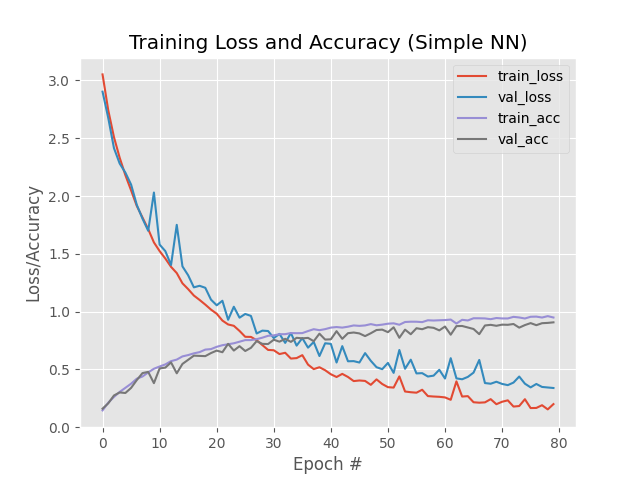

In [ ]:
# Ваш код
# строим графики потерь и точности
N = np.arange(0, H.params['epochs'])
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy (Simple NN)")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig('plot.png')
cv2_imshow(cv2.imread("plot.png"))

### 8. Сохранение модели и меток классов:

In [ ]:

def save_model_and_labels(model, lb, model_path = "model.h5", labels_path = "label_bin"):
    """
    Сохраняет модель машинного обучения и метки классов в бинарном формате на диск.

    Args:
        model: Модель машинного обучения.
        lb: Метки классов.
        model_path: Путь к файлу модели.
        labels_path: Путь к файлу меток.

    Returns:
        None.
    """

    # Сохранение модели
    model.save(model_path, save_format="h5")

    # Сохранение меток
    with open(labels_path, "wb") as f:
        f.write(pickle.dumps(lb))

In [ ]:

model_path = "model.h5"
labels_path = "label_bin"

save_model_and_labels(model, lb, model_path, labels_path)

### 9. Проверка обученной модели пользовательскими данными:

In [ ]:
!pip install -q gradio

#### 9.1. Импортируем необходимые библиотеки

In [ ]:
# Ваш код
from keras.models import load_model
import gradio as gr  # Библиотека для создания веб-интерфейсов
import pickle
import cv2

#### 9.2. Реализуем функцию для предобработки входных данных в той же последовательности, что и при формировании обучающей выборки:

In [ ]:
# Функция для предобработки изображения
def preprocess_image(img, compression_size = 80):

    """
    Функция для изменения размера, "выравнивания" и масштабирования изображения.

    Args:
    img: Изображение.

    Returns:
    Предобработанное изображение.
    """

    image = img.copy()  # Создаем копию изображения
    # Изменяем размер изображения до compression_size x compression_size пикселей
    image = cv2.resize(image, (compression_size, compression_size))
    # Преобразуем изображение в одномерный массив (вектор)
    image = image.flatten()
    # Масштабируем значения пикселей к диапазону [0, 1]
    image = image.astype("float") / 255.0
    # Преобразуем массив в формат, совместимый с нашей моделью Keras
    image = image.reshape((1, image.shape[0]))

    return image

# Ваш код
# Добавляем интерфейс для загрузки изображений напрямую из блокнота
# from google.colab import files
# uploaded = files.upload()

# загружаем входное изображение, меняем его размер на необходимый и выводим его
# image = cv2.imread(list(uploaded.keys())[0])
# output = image.copy()
# image = cv2.resize(image, (80, 80))
# cv2_imshow(image)

In [ ]:
def predict_image(img, preprocess_func = preprocess_image, model_path = "model.h5", label_path = "label_bin"):

    """
    Функция для выполнения предсказания класса, возвращает
    словарь с вероятностями для каждого класса.

    Args:
    img: Изображение.
    preprocess_funk: Функция для предобработки изображения.
    model_path: Путь к файлу модели.
    label_path: Путь к файлу с метками.

    Returns:
    Словарь с метками и вероятностями для каждого класса.
    """

    # Загружаем модель и метки
    model = load_model(model_path)  # Загрузка модели Keras
    lb = pickle.loads(open(label_path, "rb").read())  # Загрузка словаря с метками

    # Делаем предсказание на изображении
    image = preprocess_func(img.copy())  # Предобработка изображения
    preds = model.predict(image).flatten()  # Выполнение предсказания

    # Возвращаем словарь с метками и вероятностями для каждого класса
    confidences = {lb.classes_[i]: float(preds[i]) for i in range(len(preds))}

    return confidences

#### 9.3. Определим функцию для осуществления прогноза по загруженной модели:

In [ ]:
# Ваш код

### 10. Визуализируем интерфейс и произведем классификацию:

In [ ]:
# Ваш код

In [ ]:
# Создаем интерфейс Gradio
interface = gr.Interface(
    fn=predict_image,  # Функция, которая будет вызываться при загрузке изображения
    inputs=gr.Image(label="Загрузите изображение"),  # Входные данные: изображение
    outputs= gr.Label(num_top_classes=len(lb.classes_)), # Выходные данные: топ-N классов с наибольшей вероятностью
)

# Запускаем интерфейс
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f2403ab74951de3a07.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
